# **LABORATORIO NO. 5**
## **Autor**: [Author: Gabriel Nicolas Aguilera Niño](https://github.com/Niko-18-Gab)
## **Cod**. 51217

In [11]:
# Importamos la libreria para tomar datos de drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Se hace la instalasion temporal para pysentimiento

In [12]:
!pip install pysentimiento

hacemos la instalacion temporal de la libreria nltk

In [13]:
!pip install nltk

In [14]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).



Se importan las bibliotecas necesarias para el análisis de sentimientos e inicializa un objeto analizador para procesar texto en español.

In [15]:
# Importamos la librerias correspondientes en este caso nltk, pandas, pysentimiento, transformers
import nltk
import pandas as pd
import re
from nltk.corpus import stopwords
from pysentimiento import create_analyzer
import transformers

# descargamos el package de stopwords
nltk.download('stopwords')

# como es texto ya armado entonces utilizamos los transformes
transformers.logging.set_verbosity(transformers.logging.ERROR)

# Declaraos nuetra varable analyzer la cual va contener la tarea de analizar sentimientos
analyzer = create_analyzer(task="sentiment", lang="es")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Se utiliza la biblioteca pandas para procesar un archivo de Excel que contiene artículos de noticias.

In [16]:
# cargamos nuestro archivo de noticias y procedo a imprimir 2 columnas para ver su orden
cargaNoticias = pd.read_excel("/content/drive/MyDrive/laboratorios/Noticias2ver.xlsx")
cargaNoticias.head(2)

,Columna1,Título,info,contenido,Tipo
0,0,¿Cómo potencializar las ventas de un emprendim...,La época de crisis de salud por coronavirus es...,En medio de la coyuntura ocasionada por la pro...,economia
1,1,Así apoyará Corea del Sur al país para enfrent...,El Presidente aseguró que ya le han devuelto e...,"Este jueves, en el noveno día de cuarentena na...",Politica y Opinion


Este fragmento de código se centra en la limpieza y el procesamiento del contenido de la columna contenido del DataFrame cargaNoticias. Elimina elementos no deseados, aplica la eliminación de palabras irrelevantes y almacena el texto limpio en una nueva columna.

In [17]:
# quitamos la columna contenido ya que la vamos a remplesar por un contenido limpio
contenido = cargaNoticias['contenido'].dropna()

# creamos una funcion para limpiar todas la palabras de esa columna contenido
def limpiarPalabras(texto):
  texto = re.sub(r'http\S+|www\S+|https\S+', '', texto, flags=re.MULTILINE) # Quitamos contenido que no necesitomos y espacios en blanco
  texto = re.sub(r'\@w+|\#','', texto)
  texto = re.sub(r'[^\w\s]', '', texto)
  texto = " ".join(word for word in texto.split() if word not in stopwords.words('spanish'))# Quitamos las stopsWords
  return texto # Retonarmos el texto limpio

cargaNoticias['contenido_limpiado'] = contenido.apply(limpiarPalabras) # creamos una nueva columna llamada contendio_limpiado
contenido_limpiado = cargaNoticias['contenido_limpiado'] # guardamos todo en una varaible llamada contenido_limpiado

Este fragmento de código utiliza el objeto analyzer creado anteriormente para analizar el sentimiento de cada texto en la columna contenido_limpiado y luego cuenta las ocurrencias de diferentes categorías de sentimiento.

In [18]:
sentimientos = contenido_limpiado.apply(lambda x: analyzer.predict(x).output)
contenido_sentimiento = sentimientos.value_counts() # tomamos el valor contado

Este fragmento de código utiliza la biblioteca matplotlib.pyplot para crear y mostrar un gráfico de barras que visualiza la distribución de las categorías de sentimiento en la serie contenido_sentimiento

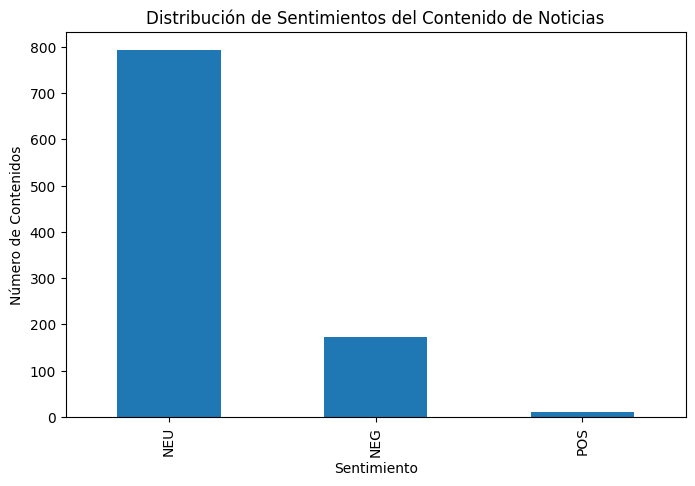

In [19]:
# Importamos la librarias de grafica
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5)) # declaramos la figura en pulgadas
contenido_sentimiento.plot(kind='bar')# declaramos es que de tipo barras
plt.title('Distribución de Sentimientos del Contenido de Noticias') # Agregamos un titulo
plt.xlabel('Sentimiento') # luego el titulo de nuestra varariables
plt.ylabel('Número de Contenidos') # el titulo de la cantidad de comentarios
plt.show() # mostramos la grafica


 creamos una varaible, en el analizer pero esta vez con la tarea de declarar emociones y repetimos el mismo proceso de arriba para hacer la respectiba graficacion

config.json:   0%|          | 0.00/1.08k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/435M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/384 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.31M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/167 [00:00<?, ?B/s]

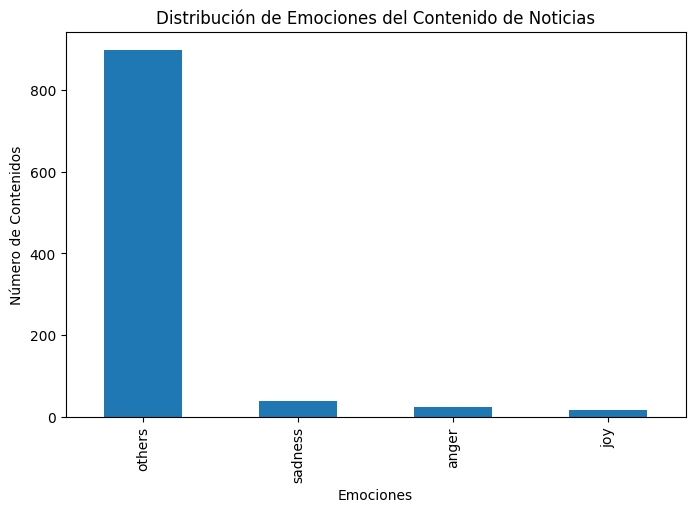

In [20]:
emociones_noticias = create_analyzer(task="emotion", lang="es")
emociones = contenido_limpiado.apply(lambda x: emociones_noticias.predict(x).output)
contenido_emocion = emociones.value_counts()

plt.figure(figsize=(8,5))
contenido_emocion.plot(kind='bar')
plt.title('Distribución de Emociones del Contenido de Noticias')
plt.xlabel('Emociones')
plt.ylabel('Número de Contenidos')
plt.show()

Este fragmento de código utiliza un analizador de discurso de odio para identificar el discurso de odio en la columna contenido_limpiado y luego crea un gráfico de barras para visualizar la distribución de las categorías de discurso de odio.

In [ ]:
hate_analyzer_Noticia = create_analyzer(task="hate_speech", lang="es") # declaramos una varaible para medir los hat con la tarea hate_speech
# seguimos el mismo camino de la primera grafica para poder graficar los hate
hate_analyzer = contenido_limpiado.apply(lambda x: hate_analyzer_Noticia.predict(x).output)
contenido_hate = hate_analyzer.value_counts()

plt.figure(figsize=(8,5))
contenido_hate.plot(kind='bar')
plt.title('Distribución de haters del Contenido de Noticias')
plt.xlabel('Hate')
plt.ylabel('Número de Contenidos')
plt.show()

#para este caso pense que habia graficado mal pero por su parte el analizis indico que de contenido de las noticias solo encontro enos de 200 comentarios haciendo hate.